In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib
pd.set_option('display.max_columns', None)

In [2]:
# Get Data
Air_Qual_combined = pd.read_csv("/Users/vbgupta/Desktop/Code/PennState/DS440/DS440-Transfer-Learning-Address-Sustainability-Issues/project/data/AQI/LAAQI.csv")
print(Air_Qual_combined.columns)

Index(['Unnamed: 0', 'Header.status', 'Header.request_time', 'Header.url',
       'Header.rows', 'Data.state_code', 'Data.county_code',
       'Data.site_number', 'Data.parameter_code', 'Data.poc', 'Data.latitude',
       'Data.longitude', 'Data.datum', 'Data.parameter', 'Data.date_local',
       'Data.time_local', 'Data.date_gmt', 'Data.time_gmt',
       'Data.sample_measurement', 'Data.units_of_measure',
       'Data.units_of_measure_code', 'Data.sample_duration',
       'Data.sample_duration_code', 'Data.sample_frequency',
       'Data.detection_limit', 'Data.uncertainty', 'Data.qualifier',
       'Data.method_type', 'Data.method', 'Data.method_code', 'Data.state',
       'Data.county', 'Data.date_of_last_change', 'Data.cbsa_code'],
      dtype='object')


In [3]:
# 2019
Air_Qual_combined_2019  = Air_Qual_combined.loc[Air_Qual_combined['Data.date_gmt'].str.contains('2019')]
Air_Qual_combined_2019.head()

,Unnamed: 0,Header.status,Header.request_time,Header.url,Header.rows,Data.state_code,Data.county_code,Data.site_number,Data.parameter_code,Data.poc,Data.latitude,Data.longitude,Data.datum,Data.parameter,Data.date_local,Data.time_local,Data.date_gmt,Data.time_gmt,Data.sample_measurement,Data.units_of_measure,Data.units_of_measure_code,Data.sample_duration,Data.sample_duration_code,Data.sample_frequency,Data.detection_limit,Data.uncertainty,Data.qualifier,Data.method_type,Data.method,Data.method_code,Data.state,Data.county,Data.date_of_last_change,Data.cbsa_code
0,1,Success,2022-02-15T14:33:17-05:00,https://aqs.epa.gov/data/api/sampleData/byCoun...,28535,6,37,2,88101,1,34.1365,-117.92391,WGS84,PM2.5 - Local Conditions,2019-01-03,00:00,2019-01-03,08:00,3.0,Micrograms/cubic meter (LC),105,24 HOUR,7,EVERY 6TH DAY,2,NaN,NaN,FRM,R & P Model 2000 PM-2.5 Air Sampler w/VSCC - G...,143,California,Los Angeles,2019-06-06,31080
1,2,Success,2022-02-15T14:33:17-05:00,https://aqs.epa.gov/data/api/sampleData/byCoun...,28535,6,37,2,88101,1,34.1365,-117.92391,WGS84,PM2.5 - Local Conditions,2019-01-09,00:00,2019-01-09,08:00,9.5,Micrograms/cubic meter (LC),105,24 HOUR,7,EVERY 6TH DAY,2,NaN,NaN,FRM,R & P Model 2000 PM-2.5 Air Sampler w/VSCC - G...,143,California,Los Angeles,2019-06-06,31080
2,3,Success,2022-02-15T14:33:17-05:00,https://aqs.epa.gov/data/api/sampleData/byCoun...,28535,6,37,2,88101,1,34.1365,-117.92391,WGS84,PM2.5 - Local Conditions,2019-01-15,00:00,2019-01-15,08:00,1.4,Micrograms/cubic meter (LC),105,24 HOUR,7,EVERY 6TH DAY,2,NaN,NaN,FRM,R & P Model 2000 PM-2.5 Air Sampler w/VSCC - G...,143,California,Los Angeles,2019-06-06,31080
3,4,Success,2022-02-15T14:33:17-05:00,https://aqs.epa.gov/data/api/sampleData/byCoun...,28535,6,37,2,88101,1,34.1365,-117.92391,WGS84,PM2.5 - Local Conditions,2019-01-21,00:00,2019-01-21,08:00,2.6,Micrograms/cubic meter (LC),105,24 HOUR,7,EVERY 6TH DAY,2,NaN,NaN,FRM,R & P Model 2000 PM-2.5 Air Sampler w/VSCC - G...,143,California,Los Angeles,2019-06-06,31080
4,5,Success,2022-02-15T14:33:17-05:00,https://aqs.epa.gov/data/api/sampleData/byCoun...,28535,6,37,2,88101,1,34.1365,-117.92391,WGS84,PM2.5 - Local Conditions,2019-01-27,00:00,2019-01-27,08:00,3.0,Micrograms/cubic meter (LC),105,24 HOUR,7,EVERY 6TH DAY,2,NaN,NaN,FRM,R & P Model 2000 PM-2.5 Air Sampler w/VSCC - G...,143,California,Los Angeles,2019-06-06,31080


In [4]:
print(len(Air_Qual_combined_2019))

28511


In [5]:
# Columns - County, City, AQI_weekly, AQI_month, AQI_year, AQI_lat, AQI_long, feature_name, Feature_val, Feature_month, feature_lat, feature_long, feature_time

Air_Qual_combined_2019 = Air_Qual_combined_2019[['Data.state', 'Data.county', 'Data.sample_frequency',
                                       'Data.longitude', 'Data.latitude', 'Data.date_gmt',
                                      'Data.sample_measurement', 'Data.time_local']]
Air_Qual_combined_2019.head(3)

,Data.state,Data.county,Data.sample_frequency,Data.longitude,Data.latitude,Data.date_gmt,Data.sample_measurement,Data.time_local
0,California,Los Angeles,EVERY 6TH DAY,-117.92391,34.1365,2019-01-03,3.0,00:00
1,California,Los Angeles,EVERY 6TH DAY,-117.92391,34.1365,2019-01-09,9.5,00:00
2,California,Los Angeles,EVERY 6TH DAY,-117.92391,34.1365,2019-01-15,1.4,00:00


In [6]:
# Rename Columns:

Air_Qual_combined_2019 = Air_Qual_combined_2019.rename(columns = {
    'Data.state': 'State', 'Data.county': 'County', 'Data.sample_frequency': 'Sample Frequency',
                                       'Data.longitude': 'AQI_lat', 'Data.latitude': 'AQI_long', 'Data.date_gmt': 'Date',
                                      'Data.sample_measurement': 'AQI_Value', 'Data.time_local': 'Time_Local'
})
Air_Qual_combined_2019.head(3)

,State,County,Sample Frequency,AQI_lat,AQI_long,Date,AQI_Value,Time_Local
0,California,Los Angeles,EVERY 6TH DAY,-117.92391,34.1365,2019-01-03,3.0,00:00
1,California,Los Angeles,EVERY 6TH DAY,-117.92391,34.1365,2019-01-09,9.5,00:00
2,California,Los Angeles,EVERY 6TH DAY,-117.92391,34.1365,2019-01-15,1.4,00:00


In [7]:
Air_Qual_combined_2019['Date'] = pd.to_datetime(Air_Qual_combined_2019.Date)

In [8]:
df_2019 = Air_Qual_combined_2019.groupby(Air_Qual_combined_2019.Date.dt.isocalendar().week)['AQI_Value'].mean().rename_axis('AQI_month').reset_index(name='AQI_weekly')
df_2019.head()

,AQI_month,AQI_weekly
0,1,13.714334
1,2,11.733581
2,3,7.055948
3,4,9.826055
4,5,12.657064


In [9]:
df_2019['AQI_year'] = 2019
df_2019.head()

,AQI_month,AQI_weekly,AQI_year
0,1,13.714334,2019
1,2,11.733581,2019
2,3,7.055948,2019
3,4,9.826055,2019
4,5,12.657064,2019


In [10]:
# 2020
Air_Qual_combined_2020  = Air_Qual_combined.loc[Air_Qual_combined['Data.date_gmt'].str.contains('2020')]
Air_Qual_combined_2020 = Air_Qual_combined_2020[['Data.state', 'Data.county', 'Data.sample_frequency',
                                       'Data.longitude', 'Data.latitude', 'Data.date_gmt',
                                      'Data.sample_measurement', 'Data.time_local']]
Air_Qual_combined_2020 = Air_Qual_combined_2020.rename(columns = {
    'Data.state': 'State', 'Data.county': 'County', 'Data.sample_frequency': 'Sample Frequency',
                                       'Data.longitude': 'AQI_lat', 'Data.latitude': 'AQI_long', 'Data.date_gmt': 'Date',
                                      'Data.sample_measurement': 'AQI_Value', 'Data.time_local': 'Time_Local'
})
Air_Qual_combined_2020['Date'] = pd.to_datetime(Air_Qual_combined_2020.Date)
print(Air_Qual_combined_2020.head())
df_2020 = Air_Qual_combined_2020.groupby(Air_Qual_combined_2020.Date.dt.isocalendar().week)['AQI_Value'].mean().rename_axis('AQI_month').reset_index(name='AQI_weekly')
df_2020.head()
len(df_2020)
df_2020['AQI_year'] = 2020

            State       County Sample Frequency    AQI_lat  AQI_long  \
10642  California  Los Angeles           HOURLY -118.17533  33.79236   
10643  California  Los Angeles           HOURLY -118.17533  33.79236   
10644  California  Los Angeles           HOURLY -118.17533  33.79236   
10645  California  Los Angeles           HOURLY -118.17533  33.79236   
10646  California  Los Angeles           HOURLY -118.17533  33.79236   

            Date  AQI_Value Time_Local  
10642 2020-01-01        1.7      16:00  
10643 2020-01-01        0.9      17:00  
10644 2020-01-01        6.1      18:00  
10645 2020-01-01       40.1      19:00  
10646 2020-01-01       68.6      20:00  


In [11]:
# 2021
Air_Qual_combined_2021  = Air_Qual_combined.loc[Air_Qual_combined['Data.date_gmt'].str.contains('2021')]
Air_Qual_combined_2021 = Air_Qual_combined_2021[['Data.state', 'Data.county', 'Data.sample_frequency',
                                       'Data.longitude', 'Data.latitude', 'Data.date_gmt',
                                      'Data.sample_measurement', 'Data.time_local']]
Air_Qual_combined_2021 = Air_Qual_combined_2021.rename(columns = {
    'Data.state': 'State', 'Data.county': 'County', 'Data.sample_frequency': 'Sample Frequency',
                                       'Data.longitude': 'AQI_lat', 'Data.latitude': 'AQI_long', 'Data.date_gmt': 'Date',
                                      'Data.sample_measurement': 'AQI_Value', 'Data.time_local': 'Time_Local'
})
Air_Qual_combined_2021['Date'] = pd.to_datetime(Air_Qual_combined_2021.Date)
print(Air_Qual_combined_2021.head())
df_2021 = Air_Qual_combined_2021.groupby(Air_Qual_combined_2021.Date.dt.isocalendar().week)['AQI_Value'].mean().rename_axis('AQI_month').reset_index(name='AQI_weekly')
df_2021.head()
len(df_2021)
df_2021['AQI_year'] = 2021

            State       County Sample Frequency    AQI_lat  AQI_long  \
39150  California  Los Angeles           HOURLY -118.17533  33.79236   
39151  California  Los Angeles           HOURLY -118.17533  33.79236   
39152  California  Los Angeles           HOURLY -118.17533  33.79236   
39153  California  Los Angeles           HOURLY -118.17533  33.79236   
39154  California  Los Angeles           HOURLY -118.17533  33.79236   

            Date  AQI_Value Time_Local  
39150 2021-01-01        6.6      16:00  
39151 2021-01-01        9.0      17:00  
39152 2021-01-01       11.2      18:00  
39153 2021-01-01       13.4      19:00  
39154 2021-01-01       53.8      20:00  


In [12]:
df_2019.head(3), df_2020.head(3), df_2021.head()

(   AQI_month  AQI_weekly  AQI_year
 0          1   13.714334      2019
 1          2   11.733581      2019
 2          3    7.055948      2019,
    AQI_month  AQI_weekly  AQI_year
 0          1   21.791349      2020
 1          2   11.991434      2020
 2          3   18.136515      2020,
    AQI_month  AQI_weekly  AQI_year
 0          1   17.713686      2021
 1          2   17.438776      2021
 2          3    9.375000      2021
 3          4    7.639305      2021
 4          5   13.348513      2021)

In [13]:
frames = [df_2019, df_2020, df_2021]

result = pd.concat(frames)

In [14]:
result

,AQI_month,AQI_weekly,AQI_year
0,1,13.714334,2019
1,2,11.733581,2019
2,3,7.055948,2019
3,4,9.826055,2019
4,5,12.657064,2019
...,...,...,...
35,36,12.850610,2021
36,37,12.083759,2021
37,38,14.495572,2021
38,39,10.496988,2021


In [15]:
result['Longitude'] = Air_Qual_combined_2019['AQI_long']
result['Latitude'] = Air_Qual_combined_2019['AQI_lat']
result['State'] = Air_Qual_combined_2019['State']
result['County'] = Air_Qual_combined_2019['County']
result['Time'] = Air_Qual_combined_2019['Time_Local']
result.head()

,AQI_month,AQI_weekly,AQI_year,Longitude,Latitude,State,County,Time
0,1,13.714334,2019,34.1365,-117.92391,California,Los Angeles,00:00
1,2,11.733581,2019,34.1365,-117.92391,California,Los Angeles,00:00
2,3,7.055948,2019,34.1365,-117.92391,California,Los Angeles,00:00
3,4,9.826055,2019,34.1365,-117.92391,California,Los Angeles,00:00
4,5,12.657064,2019,34.1365,-117.92391,California,Los Angeles,00:00


In [16]:
len(result)

145

In [17]:
result.AQI_month = result.AQI_month.map({
    1: 'Jan', 2: 'Jan', 3: 'Jan', 4: 'Jan',
    5: 'Feb', 6: 'Feb', 7: 'Feb', 8: 'Feb',
        9: 'Mar', 10: 'Mar', 11: 'Mar', 12: 'Mar',
    13: 'Apr', 14: 'Apr', 15: 'Apr', 16: 'Apr',
        17: 'May', 18: 'May', 19: 'May', 20: 'May',
    21: 'Jun', 22: 'Jun', 23: 'Jun', 24: 'Jun',
        25: 'Jul', 26: 'Jul', 27: 'Jul', 28: 'Jul',
    29: 'Aug', 30: 'Aug', 31: 'Aug', 32: 'Aug',
        33: 'Sept', 34: 'Sept', 35: 'Sept', 36: 'Sept',
    37: 'Oct', 38: 'Feb', 39: 'Feb', 40: 'Feb',
        41: 'Nov', 42: 'Nov', 43: 'Nov', 44: 'Nov',
    45: 'Feb', 46: 'Feb', 47: 'Feb', 48: 'Feb',
        49: 'Dec', 50: 'Dec', 51: 'Dec', 52: 'Dec',

})
result.head()

,AQI_month,AQI_weekly,AQI_year,Longitude,Latitude,State,County,Time
0,Jan,13.714334,2019,34.1365,-117.92391,California,Los Angeles,00:00
1,Jan,11.733581,2019,34.1365,-117.92391,California,Los Angeles,00:00
2,Jan,7.055948,2019,34.1365,-117.92391,California,Los Angeles,00:00
3,Jan,9.826055,2019,34.1365,-117.92391,California,Los Angeles,00:00
4,Feb,12.657064,2019,34.1365,-117.92391,California,Los Angeles,00:00


In [18]:
result['State'] = 'Los Angeles'
result = result.rename(columns = {'State': 'City'})
result.head()

,AQI_month,AQI_weekly,AQI_year,Longitude,Latitude,City,County,Time
0,Jan,13.714334,2019,34.1365,-117.92391,Los Angeles,Los Angeles,00:00
1,Jan,11.733581,2019,34.1365,-117.92391,Los Angeles,Los Angeles,00:00
2,Jan,7.055948,2019,34.1365,-117.92391,Los Angeles,Los Angeles,00:00
3,Jan,9.826055,2019,34.1365,-117.92391,Los Angeles,Los Angeles,00:00
4,Feb,12.657064,2019,34.1365,-117.92391,Los Angeles,Los Angeles,00:00


In [20]:
result = result.drop('Time', axis = 1)
result.head()

,AQI_month,AQI_weekly,AQI_year,Longitude,Latitude,City,County
0,Jan,13.714334,2019,34.1365,-117.92391,Los Angeles,Los Angeles
1,Jan,11.733581,2019,34.1365,-117.92391,Los Angeles,Los Angeles
2,Jan,7.055948,2019,34.1365,-117.92391,Los Angeles,Los Angeles
3,Jan,9.826055,2019,34.1365,-117.92391,Los Angeles,Los Angeles
4,Feb,12.657064,2019,34.1365,-117.92391,Los Angeles,Los Angeles


In [22]:
result.to_csv('LA_AQI_Final.csv')

<AxesSubplot:ylabel='AQI_weekly'>

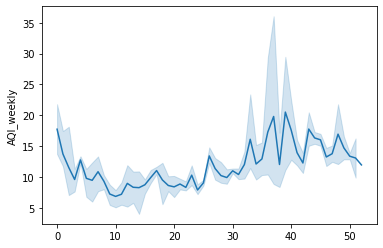

In [27]:
sns.lineplot(data = result['AQI_weekly'])

<AxesSubplot:xlabel='AQI_month', ylabel='AQI_weekly'>

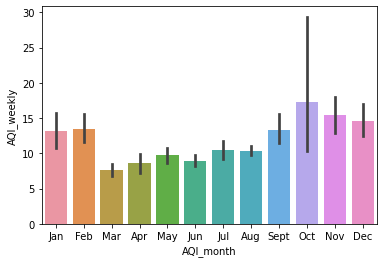

In [28]:
sns.barplot(x = "AQI_month", y = "AQI_weekly", data = result)

<AxesSubplot:xlabel='AQI_year', ylabel='AQI_weekly'>

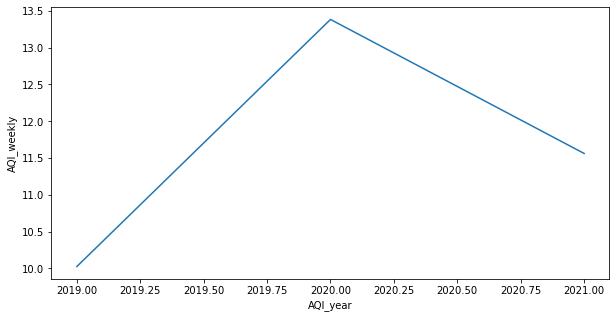

In [36]:
plt.figure(figsize = (10,5))
sns.lineplot(x = "AQI_year", y = "AQI_weekly", data = result.groupby('AQI_year').mean('AQI_weekly'))